In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import contextlib


In [3]:
from mpl_toolkits import mplot3d

In [4]:
sys.path.insert(0, '../')
import config

## Setup detector with card

In [5]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [6]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_nsw_pad_z0.yml')
#my_detector.read_card('../cards/atlas_mm_road.yml')

-- Initializing detector --
-- Reading card --


## Coverage angle

In [7]:
def get_coverage_angles(x):
    dz = my_detector.planes[-1].z - my_detector.planes[0].z
    dx = 0.5*my_detector.planes[-1].sizes['x']
    th_p = np.max( [np.arctan((dx-x)/dz), 0] )
    th_m = np.min( [-np.arctan((dx+x)/dz), 0] )
    return (th_m,th_p)

In [8]:
get_coverage_angles(-5)

(-0.04816217249000135, 0.07575502864254634)

## Pass muon

In [46]:
mux = -5
mua = 0.05 #get_coverage_angles(mux)[1]

my_detector.reset_planes()
my_detector.add_muon(
        mu_x=mux, 
        mu_y=-10, 
        mu_theta=mua, 
        mu_phi=0, 
        mu_time=0
    )

## Add noise

Noise rate in Hertz per strip is set in detector cards. First argument here is a multiplicative scale factor. Second argument is a random seed number.

In [87]:
my_detector.add_noise(1, randseed=37)

## Process signal

In [88]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 2
Total number of hits: 1
Total number of hits: 1
Total number of hits: 1
Total number of hits: 2
Total number of hits: 2
Total number of hits: 3
Total number of hits: 1
Total number of hits: 1
Total number of hits: 3
Total number of hits: 4
Total number of hits: 4
Total number of hits: 1
Total number of hits: 1
Total number of hits: 0
Total number of hits: 1


## Plot detector volume

In [10]:
from plotting import plotting

In [11]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '../plotting/plotting.py'>

Found muon signal, plane  0  xseg  4  time  1.5945109234469168
Found muon signal, plane  1  xseg  5  time  5.284316829631641
Found muon signal, plane  2  xseg  5  time  -0.281987362825336
Found muon signal, plane  3  xseg  5  time  -8.265006100849005
Found muon signal, plane  4  xseg  49  time  -14.714320560264055
Found bkg signal, plane  5  xseg  0  time  -99.60629952623785
Found bkg signal, plane  6  xseg  91  time  94.5015486857182
Found bkg signal, plane  6  xseg  100  time  8.28293000381899
Found muon signal, plane  7  xseg  68  time  32.4700751124034
Found muon signal, plane  8  xseg  81  time  -31.35317864767216
Found bkg signal, plane  9  xseg  56  time  -66.73693512335441
Found muon signal, plane  9  xseg  82  time  -4.786610179874836
Found bkg signal, plane  10  xseg  65  time  -78.85543767751577
Found bkg signal, plane  11  xseg  40  time  -89.9072562945373
Found muon signal, plane  12  xseg  10  time  3.3281552405202057
Found muon signal, plane  13  xseg  10  time  -1.72890

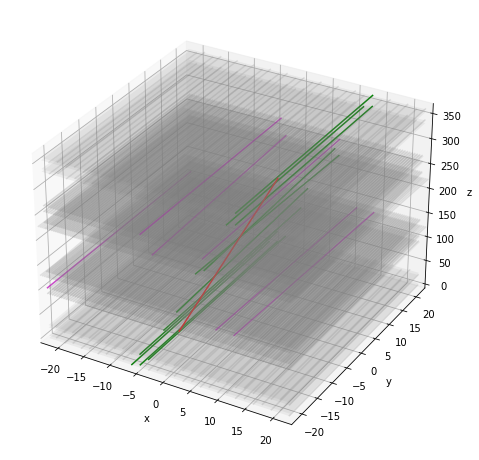

In [91]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)

Found muon signal, plane  0  ihit  0  time  1.5945109234469168
Found bkg signal, plane  0  ihit  1  time  3.0021052543406785
Found muon signal, plane  1  ihit  0  time  5.284316829631641
Found muon signal, plane  2  ihit  0  time  -0.281987362825336
Found muon signal, plane  3  ihit  0  time  -8.265006100849005
Found muon signal, plane  4  ihit  0  time  -14.714320560264055
Found bkg signal, plane  4  ihit  1  time  94.73087035760861
Found bkg signal, plane  5  ihit  0  time  -99.60629952623785
Found muon signal, plane  5  ihit  1  time  67.30467595179708
Found bkg signal, plane  6  ihit  0  time  8.28293000381899
Found bkg signal, plane  6  ihit  1  time  94.5015486857182
Found bkg signal, plane  6  ihit  2  time  99.81027593231596
Found muon signal, plane  7  ihit  0  time  32.4700751124034
Found muon signal, plane  8  ihit  0  time  -31.35317864767216
Found bkg signal, plane  9  ihit  0  time  -66.73693512335441
Found muon signal, plane  9  ihit  1  time  -4.786610179874836
Found bk

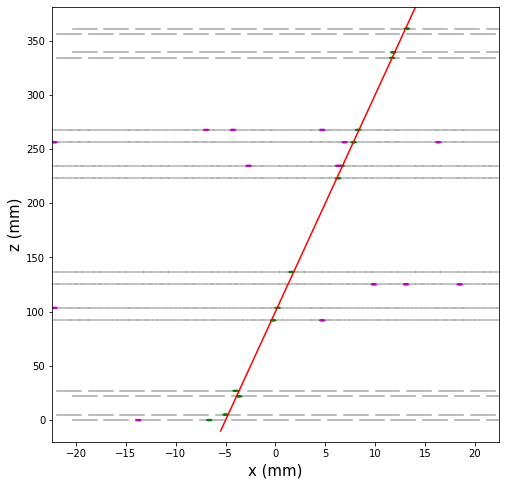

In [92]:
fig2 = plt.figure(figsize=(8,8))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=True)
plt.show()

In [16]:
def create_and_display_2d(mux = -5, mua = 0.05, randseed=37):
    my_detector.reset_planes()
    my_detector.add_muon(
        mu_x=mux, 
        mu_y=-10, 
        mu_theta=mua, 
        mu_phi=0, 
        mu_time=0,
        randseed=randseed
    )
    my_detector.add_noise(1, randseed=randseed)
    fig2 = plt.figure(figsize=(6,6))
    ax2 = plt.axes()
    plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=True)
    plt.savefig("m2d_plot.pdf")
    plt.show()


[Point3D(-2746771497340815/499375130197483, -10, -10)] [Point3D(71580497164793/5000000000000, -10, 386)]


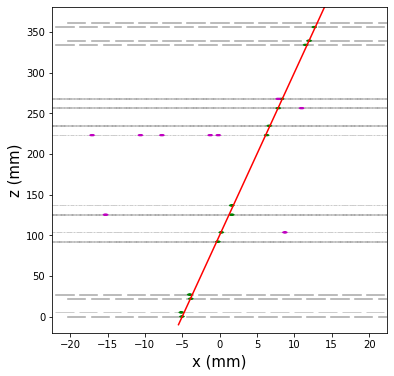

In [17]:
create_and_display_2d(randseed=34)

[Point3D(-2746771497340815/499375130197483, -10, -10)] [Point3D(71580497164793/5000000000000, -10, 386)]


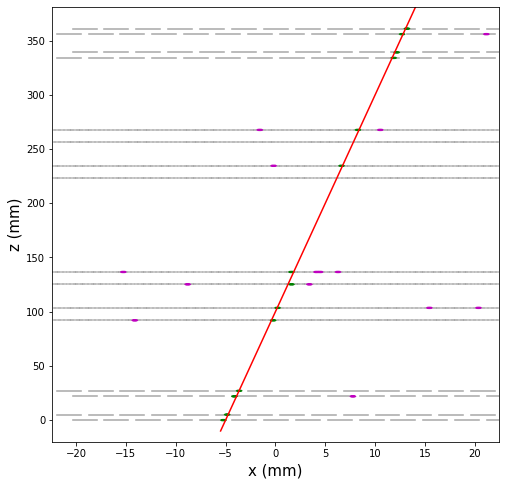

In [106]:
create_and_display_2d(randseed=35)

[Point3D(-2746771497340815/499375130197483, -10, -10)] [Point3D(71580497164793/5000000000000, -10, 386)]


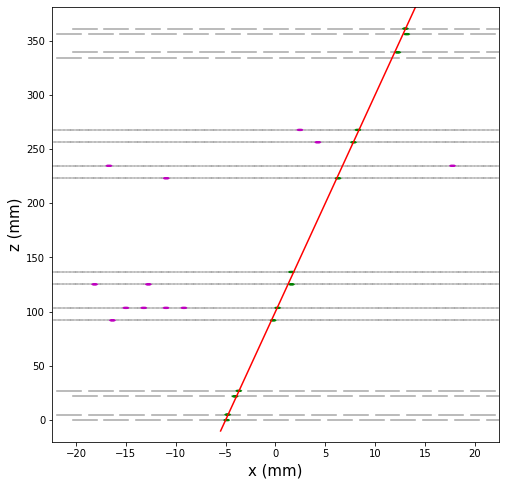

In [107]:
create_and_display_2d(randseed=36)

[Point3D(-2746771497340815/499375130197483, -10, -10)] [Point3D(71580497164793/5000000000000, -10, 386)]


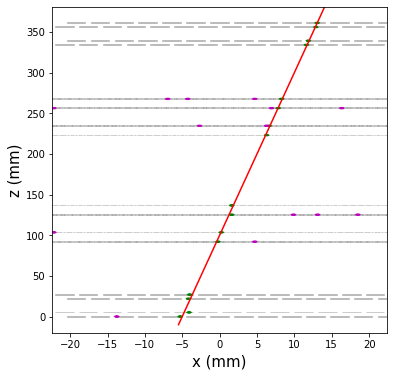

In [18]:
create_and_display_2d(randseed=37)

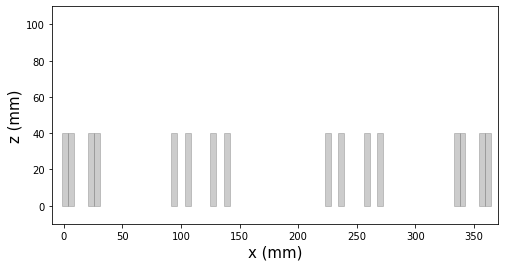

In [45]:
from plotting import plotting
importlib.reload(plotting)
fig2 = plt.figure(figsize=(8,4))
ax2 = plt.axes()
plotting.plot_det_geo_xz(my_detector,ax2)
plt.show()